# 1. Use pandas to create a Series from the following data:

- a. Name the variable that holds the series fruits.

- b. Run .describe() on the series to see what describe returns for a series of strings.

- c. Run the code necessary to produce only the unique fruit names.

- d. Determine how many times each value occurs in the series.

- e. Determine the most frequently occurring fruit name from the series.

- f. Determine the least frequently occurring fruit name from the series.

- g. Write the code to get the longest string from the fruits series.

- h. Find the fruit(s) with 5 or more letters in the name.

- i. Capitalize all the fruit strings in the series.

- j. Count the letter "a" in all the fruits (use string vectorization)

- k. Output the number of vowels in each and every fruit.

- l. Use the .apply method and a lambda function to find the fruit(s) containing two or more "o" letters in the name.

- m. Write the code to get only the fruits containing "berry" in the name

- n. Write the code to get only the fruits containing "apple" in the name

- o. Which fruit has the highest amount of vowels?

In [140]:
#import pands to use series
import pandas as pd

#create a series using name = pd.Series()
fruits = pd.Series(["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"])
#fruits = pd.Series(["kiwi", "mango", "mango", "mango","strawberry", "pineapple", "gala apple", "gala apple", "gala apple", "gala apple","honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"])

In [10]:
#dataFrame.describe()
#Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution
#excluding NaN values.
fruits.describe()

count       17
unique      13
top       kiwi
freq         4
dtype: object

In [58]:
#unique function returns the unique values as a NumPy array
fruits.unique()

array(['kiwi', 'mango', 'strawberry', 'pineapple', 'gala apple',
       'honeycrisp apple', 'tomato', 'watermelon', 'honeydew',
       'blueberry', 'blackberry', 'gooseberry', 'papaya'], dtype=object)

In [61]:
#value counts shows count per unique index
fruits.value_counts()

kiwi                4
mango               2
gala apple          1
tomato              1
honeydew            1
watermelon          1
honeycrisp apple    1
strawberry          1
pineapple           1
blackberry          1
blueberry           1
gooseberry          1
papaya              1
dtype: int64

In [73]:
#value counts shows count per unique index
#max shows maximum value of count
#idxmax shows the index name for max
print(fruits.value_counts().idxmax())

#can use mode for most often, prints index value 
print(fruits.mode())

#can also use nlargest function, which includes the count
fruits.value_counts().nlargest(1, keep='all')

kiwi
0    kiwi
dtype: object


kiwi    4
dtype: int64

In [72]:
#nsmallest can show all smallest value count, if you specify keep = 'all'
fruits.value_counts().nsmallest(1, keep = 'all')

gala apple          1
tomato              1
honeydew            1
watermelon          1
honeycrisp apple    1
strawberry          1
pineapple           1
blackberry          1
blueberry           1
gooseberry          1
papaya              1
dtype: int64

In [80]:
#result finds the index value of the fruit with the longest string
result = fruits.map(len).idxmax()

#we print the fruit with that index
fruits[result]

'honeycrisp apple'

In [126]:
#the conditional inside the array checks if the string length is greater than 5
print(fruits[(fruits.str.len()) > 5])

2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object


In [104]:
#seriesname.str.capitalie() capitalizes each value in the series
#only works with strings and you need .str
fruits.str.capitalize()

0                 Kiwi
1                Mango
2           Strawberry
3            Pineapple
4           Gala apple
5     Honeycrisp apple
6               Tomato
7           Watermelon
8             Honeydew
9                 Kiwi
10                Kiwi
11                Kiwi
12               Mango
13           Blueberry
14          Blackberry
15          Gooseberry
16              Papaya
dtype: object

In [183]:
#function that counts a's within a string
def count_as(string):
    count = 0
    vowels = set("aA")
    for ch in string:
        if ch in vowels:
            count = count + 1
    return count

#apply applies the function to the series string by string
#we take the count of this to find how many a's in the series as a whole
print('''The total amount of a's in the series is: ''' + str(fruits.apply(count_as).count()))
fruits.apply(count_as)

#another option is to str count a
fruits.str.count('a')

The total amount of a's in the series is: 17


0     0
1     1
2     1
3     1
4     3
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    1
13    0
14    1
15    0
16    3
dtype: int64

In [171]:
#defines a function that counts the vowels in a string
def count_vowels(string):
    count = 0
    vowels = set("aeiouAEIOU")
    for ch in string:
        if ch in vowels:
            count = count + 1
    return count

#the function is applied to each string in the series
fruits.apply(count_vowels)

#another option is to string count with the values you're looking for
fruits.str.count('[aeiou]')

0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
dtype: int64

In [174]:
#the lambda function retruns True if there are 2 or more o's in each string in the series
#we use the lambda function with apply to use it on the series
#encasing in fruits[] shows us each value that returns true
fruits[fruits.apply(lambda n: True if n.count('o') >= 2 else False)]

6         tomato
15    gooseberry
dtype: object

In [176]:
#the lambda function retruns True if there is 'berry' in each string in the series
#we use the lambda function with apply to use it on the series
#encasing in fruits[] shows us each value that returns true
fruits[fruits.apply(lambda n: True if n.count('berry') == 1 else False)]

2     strawberry
13     blueberry
14    blackberry
15    gooseberry
dtype: object

In [177]:
#the lambda function retruns True if there is 'apple' in each string in the series
#we use the lambda function with apply to use it on the series
#encasing in fruits[] shows us each value that returns true
fruits[fruits.apply(lambda n: True if n.count('apple') == 1 else False)]

3           pineapple
4          gala apple
5    honeycrisp apple
dtype: object

In [184]:
#we use the count_vowel function from before
#we use it on the series with apply
#idxmac finds the index of the value with the most vowels
index = fruits.apply(count_vowels).idxmax()

#we access this value with fruits[index]
print('The fruit with the most vowels is "' + fruits[index] + '".')

The fruit with the most vowels is "honeycrisp apple".


# 2. Use pandas to create a Series from the following data:

- a. What is the data type of the series?
- b. Use series operations to convert the series to a numeric data type.
- c. What is the maximum value? The minimum?
- d. Bin the data into 4 equally sized intervals and show how many values fall into each bin.
- e. Plot a histogram of the data. Be sure to include a title and axis labels.

In [200]:
cash_flow = pd.Series(['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23'])

In [187]:
type(cash_flow)

pandas.core.series.Series

In [201]:
cash_flow = cash_flow.apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype('float')

In [202]:
cash_flow

0      796459.41
1         278.60
2      482571.67
3     4503915.98
4     2121418.30
5     1260813.30
6       87231.01
7     1509175.45
8     4138548.00
9     2848913.80
10     594715.39
11    4789988.17
12    4513644.50
13    3191059.97
14    1758712.24
15    4338283.54
16    4738303.38
17    2791759.67
18     769681.94
19     452650.23
dtype: float64

In [204]:
print(cash_flow.max())
print(cash_flow.min())

4789988.17
278.6


In [217]:
pd.cut(cash_flow, 4).value_counts()

(-4511.11, 1197705.993]       7
(3592560.778, 4789988.17]     6
(1197705.993, 2395133.385]    4
(2395133.385, 3592560.778]    3
dtype: int64

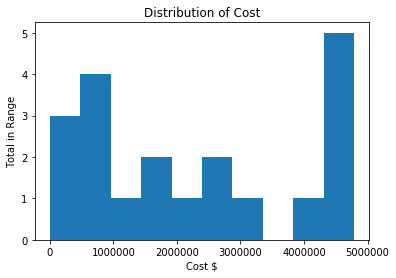

In [234]:
import matplotlib.pyplot as plt
plt.hist(cash_flow)
plt.title('Distribution of Cost')
plt.xlabel('Cost $')
plt.ylabel('Total in Range')
plt.show()

# 3. Use pandas to create a Series from the following data:

- a. What is the minimum exam score? The max, mean, median?
- b. Plot a histogram of the scores.
- c. Convert each of the numbers above into a letter grade. For example, 86 should be a 'B' and 95 should be an 'A'.
- d. Write the code necessary to implement a curve. I.e. that grade closest to 100 should be converted to a 100, and that many points should be given to every other score as well.

In [219]:
grades = pd.Series([60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78])

In [224]:
grades.min()
grades.max()
grades.mean()
grades.median()

79.0

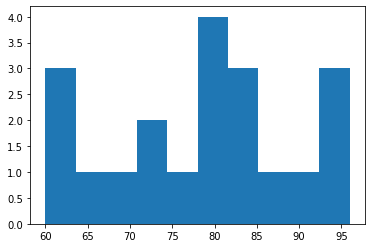

In [225]:
plt.hist(grades)
plt.show()

# 4. Use pandas to create a Series from the following data:

- a. What is the most frequently occuring letter? Least frequently occuring?
- b. How many vowels are in the list?
- c. How many consonants are in the list?
- d. Create a series that has all of the same letters, but uppercased
- e. Create a bar plot of the frequencies of the 6 most frequently occuring letters.

In [ ]:
'hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'